# Neural Network: Regression using MLP in Keras

## 1. Data Loading and Preparation

Import required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

Load California Housing dataset from TensorFlow API. Use 60:20:20 ratio for the segmentation of training, validation, and testing datasets

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.california_housing.load_data(
    path='california_housing.npz',
    test_split=0.2,
    seed=113
)

In [3]:
from sklearn.model_selection import train_test_split

# 0.25 * 0.8 = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25)

In [4]:
print("Training shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_valid.shape, y_valid.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (12384, 8) (12384,)
Validation shape: (4128, 8) (4128,)
Testing shape: (4128, 8) (4128,)


## 2. Data Preprocessing

From previous assignment, the median_housing_value (our target) contains outlier at value more than 500,000. It is observed that the dataset clipped any houses with price more than 500,000 (threshold). Thus, if we plot the histogram, we will see a huge surge when the median_housing_value is more than 500,000.

Let's remove this outliers.

In [5]:
X_train = X_train[y_train < 500000]
y_train = y_train[y_train < 500000]
X_test = X_test[y_test < 500000]
y_test = y_test[y_test < 500000]
X_valid = X_valid[y_valid < 500000]
y_valid = y_valid[y_valid < 500000]

Standardize the features using StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Scale the target variable to ensure it falls within a specific range, which can help the model to learn more effectively.

In [7]:
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_valid = scaler.transform(y_valid.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

##  3. Build Sequential Regression MLP Model

Model Architecture:
- Input Layer: Takes input of shape equal to the number of features (8).
- First Hidden Layer: Fully connected layer with 128 neurons and ReLU activation.
- Dropout Layer: Applies dropout to 20% of the neurons to prevent overfitting.
- Second Hidden Layer: Fully connected layer with 64 neurons and ReLU activation.
- Output Layer: Fully connected layer with 1 neuron, providing the final regression output.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

## 3. Compile Model

- Use MSE as loss function with Adam optimizer
- Evaluate model using MAE
- Additional: Learning rate of the adam optimizer is adjusted

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

## 4. Model Training

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5337 - mean_absolute_error: 0.5497 - val_loss: 0.3317 - val_mean_absolute_error: 0.4237
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.3532 - mean_absolute_error: 0.4398 - val_loss: 0.3108 - val_mean_absolute_error: 0.3984
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3239 - mean_absolute_error: 0.4156 - val_loss: 0.2990 - val_mean_absolute_error: 0.3904
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.3043 - mean_absolute_error: 0.3979 - val_loss: 0.3011 - val_mean_absolute_error: 0.4007
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3091 - mean_absolute_error: 0.4010 - val_loss: 0.2909 - val_mean_absolute_error: 0.3732
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2935 - mean_absolute_error: 0.3921 - val_loss: 0.2887 - val_mean_absolute_error: 0.3824
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.2795 - mean_absolute_erro

Let's plot the training history.

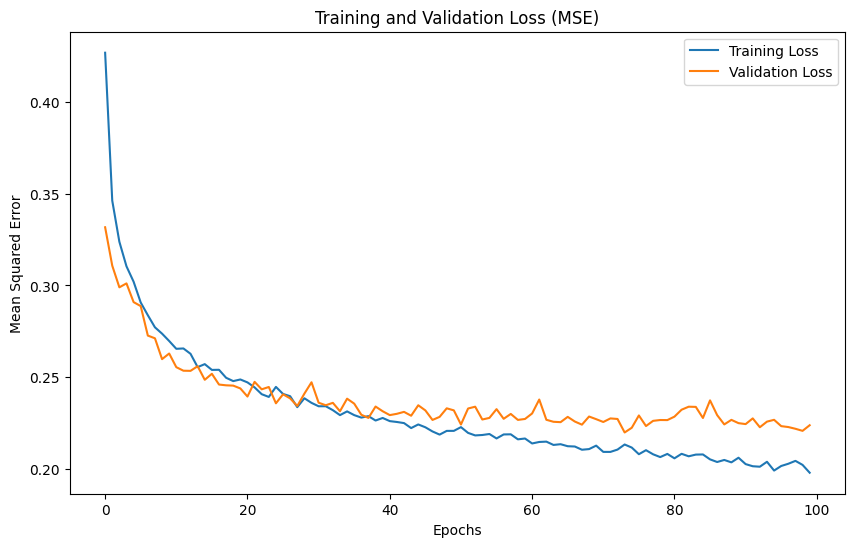

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss (MSE)')
plt.legend()
plt.show()

Let's also plot how the MAE change during training.

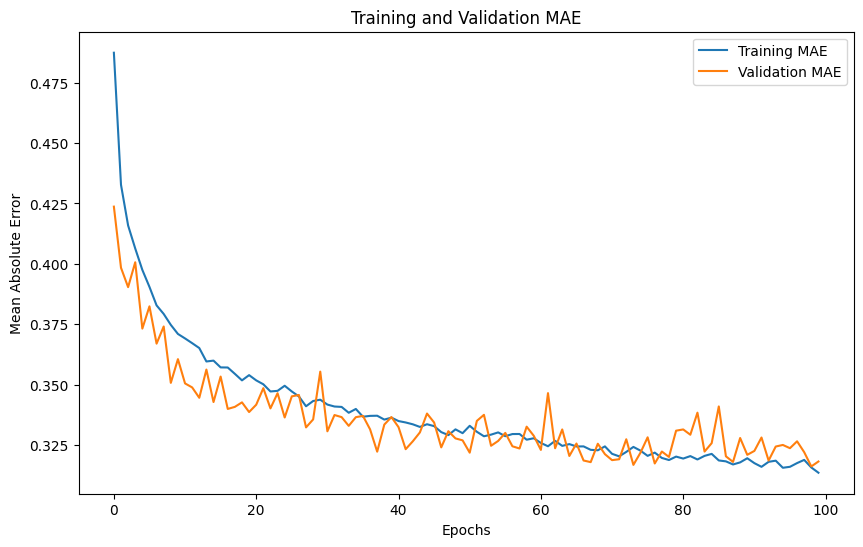

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

## 5. Model Evaluation

In [14]:
mse, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on test set: {mse}")
print(f"Mean Absolute Error on test set: {mae}")

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.2306 - mean_absolute_error: 0.3253
Mean Squared Error on test set: 0.2286626100540161
Mean Absolute Error on test set: 0.325112909078598


Oops, we need to revert back the scaling to get the true value of the predicted median_housing_value.

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
Mean Squared Error on test set (original scale): 2184271616.0
Mean Absolute Error on test set (original scale): 31775.314453125


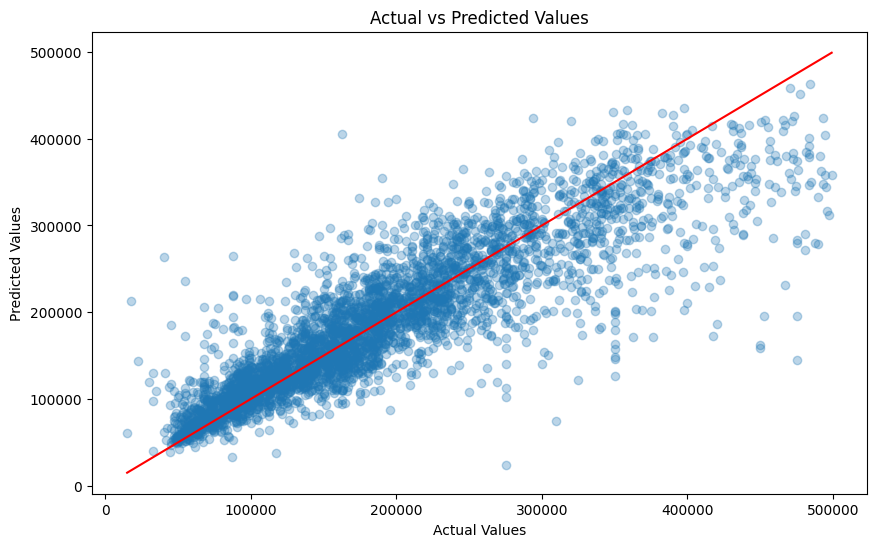

In [15]:
# Inverse transform the predictions and the true values
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate the Mean Squared Error and Mean Absolute Error in the original scale
mse_original = np.mean((y_pred - y_test_original) ** 2)
mae_original = np.mean(np.abs(y_pred - y_test_original))

print(f"Mean Squared Error on test set (original scale): {mse_original}")
print(f"Mean Absolute Error on test set (original scale): {mae_original}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.3)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Observations from MAE of testing prediction:
- MAE = 31,775. 
- It is quite accurate to be honest.

Observations from Actual vs Predicted plot:
- The points are more concentrated along the red line in the lower value range (below 200,000), which indicates better performance for houses in this price range.
- The spread of points increases as the actual value increases, which shows that the model is less accurate for higher-priced houses.
- The points appear to be more dispersed for actual values above 300,000, indicating higher prediction errors in this range.